In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style, ticker

In [ ]:
# Read in the data
df = pd.read_csv('uao_ctas.csv')
df.head()

##### <b> COMIENZA EL EDA, VAMOS A VER QUE CARRERA DEBE MÁS

In [ ]:
df_programa_sum = df.groupby('programa').sum()
deuda_promedio_programa = df.groupby('programa').mean()
top5_debt = df_programa_sum.sort_values('deuda', ascending=False).head()
top5_vencido = df_programa_sum.sort_values('vencido', ascending=False).head()

In [ ]:
# creando las ticks del top 5
ticks = top5_debt.index
ticks2=[]
for i in ticks:
    # ticks3.append(i.split()[:2])
    if not len(i.split()[:2][1]) > 1:
        ticks2.append(" ".join(i.split()[:1]))
    else: ticks2.append(" ".join(i.split()[:2]))
ticks3 = []
for i in ticks2:
    if len(i.split()) == 2:
        ticks3.append(f"{i.split()[0][:3]}-{i.split()[1]}")
    else:
        ticks3.append(i)


@ticker.FuncFormatter
def major_formatter(x, pos):
    return f'{int(x):,}$'

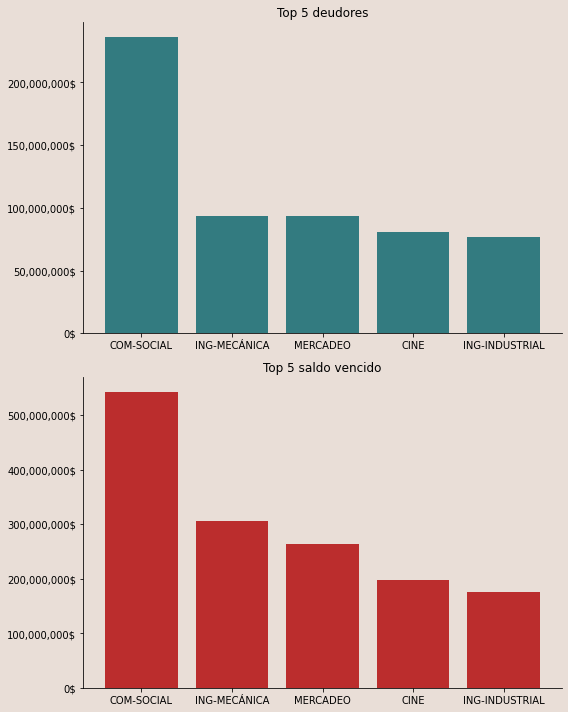

In [229]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
fig.patch.set_facecolor('#E9DED7')

for ax in axs:
    ax.set_facecolor('#E9DED7')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].bar(top5_debt.index, top5_debt['deuda'], color='#337B80')
axs[0].set_title('Top 5 deudores')

axs[0].ticklabel_format(style='plain', axis='y')
axs[0].xaxis.set_major_formatter(lambda x, pos: ticks3[int(x)])
# axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}$"))
axs[0].yaxis.set_major_formatter(major_formatter)
# axs[0].set_xticklabels(ticks3,rotation = 25)

"-----------------------------------------------------------------------------"

axs[1].bar(top5_vencido.index, top5_vencido['vencido'], color='#BB2D2D')
axs[1].set_title('Top 5 saldo vencido')

axs[1].ticklabel_format(style='plain', axis='y')
axs[1].xaxis.set_major_formatter(lambda x, pos: ticks3[int(x)])
# axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}$"))
axs[1].yaxis.set_major_formatter(major_formatter)
# axs[0].set_xticklabels(ticks3,rotation = 25)
# plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout()
plt.savefig('./graphs/top5.png', facecolor=fig.get_facecolor())
plt.show()

##### <b> GRAFICO CIRCULAR CON CORDENADAS POLARES

In [ ]:
top_names_debt = df.sort_values('deuda', ascending=False).head(20)

In [184]:
upperLimit = 150
lowerLimit = 30

maxi = top_names_debt['deuda'].max()
mini = top_names_debt['deuda'].min()

slope = (maxi - lowerLimit) / maxi
heights = slope * top_names_debt['deuda'] + lowerLimit

width = 2*np.pi / len(top_names_debt.index)

indexes = list(range(1, len(top_names_debt.index)+1))
angles = [element * width for element in indexes]



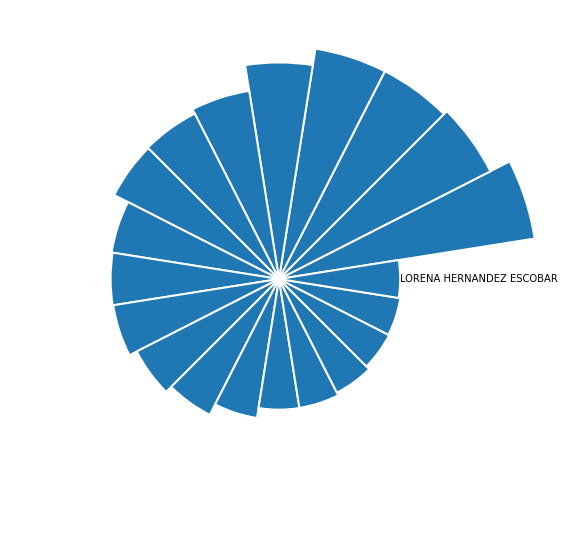

In [188]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis("off")

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")
labelPadding = 4
for bar, angle, height, label in zip(bars,angles, heights, df["nombre"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

plt.show()


### <B> GRAFICO DE LOS ESTUDIANTES CON MÁS DEUDA

In [210]:
top_names_debt = df.sort_values('deuda', ascending=False).head(20)
top_names_debt.sort_values('deuda', ascending=True, inplace=True)

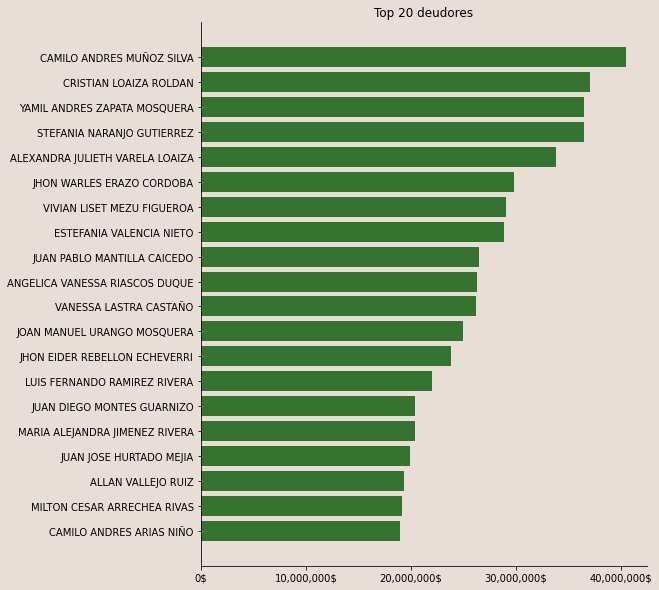

In [230]:
fig, ax = plt.subplots(1,1, figsize=(8, 10))
fig.patch.set_facecolor('#E9DED7')
ax.set_facecolor('#E9DED7')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Top 20 deudores")


ax.barh(top_names_debt['nombre'], top_names_debt['deuda'],color='#367230')
ax.set_xticks(ax.get_xticks()[::2])
ax.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(major_formatter)

plt.savefig('./graphs/top20.png', facecolor=fig.get_facecolor(),transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()